<h2><center>Dakshay Ahuja - 2010990178</center></h2>

# CNN

Found class: Boots, 326 images


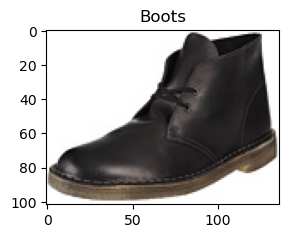

Found class: Sandals, 306 images


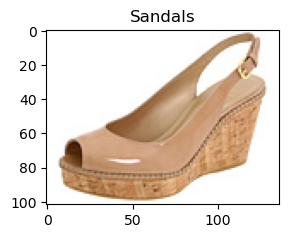

Found class: Slippers, 146 images


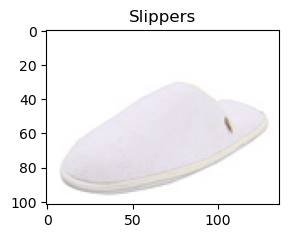

In [1]:
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

train_data_dir = 'Dataset/CNN/train'

for class_name in os.listdir(train_data_dir):
    class_dir = os.path.join(train_data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f'Found class: {class_name}, {len(os.listdir(class_dir))} images')

        img_path = os.path.join(class_dir, os.listdir(class_dir)[0])
        img = image.load_img(img_path)
        plt.figure(figsize=(3,3))
        plt.imshow(img)
        plt.title(class_name)
        plt.show()

In [2]:
img_width, img_height = 50,50

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 778 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [3]:
test_data_dir = 'Dataset/CNN/test'

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 89 images belonging to 1 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50
25/25 [==============================] - 1s 29ms/step - loss: 0.9863 - accuracy: 0.5000
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 0.6891 - accuracy: 0.7095
Epoch 3/50
25/25 [==============================] - 1s 25ms/step - loss: 0.4985 - accuracy: 0.7995
Epoch 4/50
25/25 [==============================] - 1s 25ms/step - loss: 0.4714 - accuracy: 0.8098
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3643 - accuracy: 0.8586
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3167 - accuracy: 0.8779
Epoch 7/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3304 - accuracy: 0.8817
Epoch 8/50
25/25 [==============================] - 1s 24ms/step - loss: 0.3229 - accuracy: 0.8843
Epoch 9/50
25/25 [==============================] - 1s 26ms/step - loss: 0.2886 - accuracy: 0.8920
Epoch 10/50
25/25 [==============================] - 1s 24ms/step - loss: 0.2906 - accuracy: 0.8766
Epoch 11/

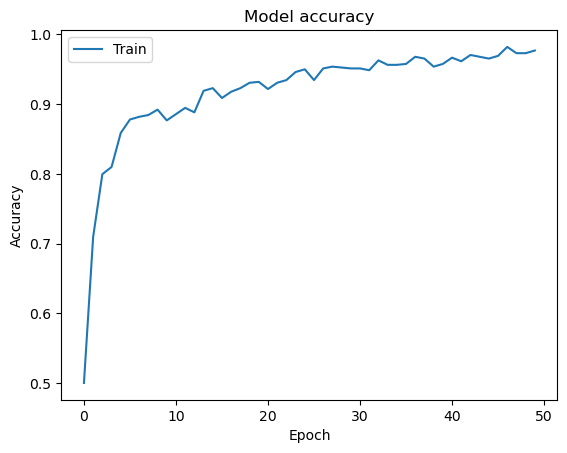

In [7]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [8]:
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_class_indices = np.argmax(predictions, axis=1)

89/89 [==============================] - 0s 1ms/step


In [9]:
class_labels = {0: "boots", 1: "sandals", 2: "slippers"}
predicted_class_labels = [class_labels[idx] for idx in predicted_class_indices]

for i, (path, label) in enumerate(zip(test_generator.filenames, predicted_class_labels)):
    print(f"Image {path} is predicted as {label}")

Image shoes/image (1).jpg is predicted as sandals
Image shoes/image (10).jpg is predicted as boots
Image shoes/image (11).jpg is predicted as boots
Image shoes/image (12).jpg is predicted as slippers
Image shoes/image (13).jpg is predicted as boots
Image shoes/image (14).jpg is predicted as sandals
Image shoes/image (15).jpg is predicted as boots
Image shoes/image (16).jpg is predicted as sandals
Image shoes/image (17).jpg is predicted as sandals
Image shoes/image (18).jpg is predicted as boots
Image shoes/image (19).jpg is predicted as boots
Image shoes/image (2).jpg is predicted as boots
Image shoes/image (20).jpg is predicted as boots
Image shoes/image (21).jpg is predicted as boots
Image shoes/image (22).jpg is predicted as boots
Image shoes/image (23).jpg is predicted as boots
Image shoes/image (24).jpg is predicted as sandals
Image shoes/image (25).jpg is predicted as sandals
Image shoes/image (26).jpg is predicted as sandals
Image shoes/image (27).jpg is predicted as sandals
Ima

# RNN

In [10]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [11]:
train_data = pd.read_csv('Dataset/RNN/tweets_train.csv')
test_data = pd.read_csv('Dataset/RNN/tweets_test.csv')

In [12]:
train_tweets = train_data['clean_text'].values
train_labels = train_data['Sentiment'].values
test_tweets = test_data['clean_text'].values

In [13]:
train_tweets = np.where(pd.isnull(train_tweets), ' ', train_tweets).astype(str)
test_tweets = np.where(pd.isnull(test_tweets), ' ', test_tweets).astype(str)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweets)

train_sequences = tokenizer.texts_to_sequences(train_tweets)
test_sequences = tokenizer.texts_to_sequences(test_tweets)

In [14]:
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [15]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
train_labels = to_categorical(train_labels)

In [16]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(train_labels.shape[1], activation='softmax'))

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_padded, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
479/479 [==============================] - 1s 1ms/step - loss: 0.9489 - accuracy: 0.5499 - val_loss: 0.7661 - val_accuracy: 0.6747
Epoch 2/10
479/479 [==============================] - 1s 1ms/step - loss: 0.6422 - accuracy: 0.7497 - val_loss: 0.5378 - val_accuracy: 0.7959
Epoch 3/10
479/479 [==============================] - 1s 1ms/step - loss: 0.4207 - accuracy: 0.8548 - val_loss: 0.4147 - val_accuracy: 0.8435
Epoch 4/10
479/479 [==============================] - 1s 2ms/step - loss: 0.2788 - accuracy: 0.9120 - val_loss: 0.3575 - val_accuracy: 0.8612
Epoch 5/10
479/479 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9422 - val_loss: 0.3378 - val_accuracy: 0.8812
Epoch 6/10
479/479 [==============================] - 1s 1ms/step - loss: 0.1448 - accuracy: 0.9593 - val_loss: 0.3233 - val_accuracy: 0.8871
Epoch 7/10
479/479 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.9705 - val_loss: 0.3191 - val_accuracy: 0.8900
Epoch 

In [19]:
predictions = model.predict(test_padded)

96/96 [==============================] - 0s 286us/step


In [20]:
predicted_classes = predictions.argmax(axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_classes)
result = pd.DataFrame({'user_name': test_data['user_name'], 'predicted_sentiment': predicted_labels})

In [21]:
result

,user_name,predicted_sentiment
0,Doug Webb,Neutral
1,Dan Reynish,Neutral
2,🌤,Positive
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,Neutral
4,Mahima Sood,Positive
...,...,...
3063,𝘔𝘶𝘳𝘪;🦋,Neutral
3064,Didi Crawford,Neutral
3065,Ritwik Arora,Neutral
3066,Nishant Mody,Positive
